# Практична робота №6
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

Epoch 1/200
25/25 [==============================] - 1s 6ms/step - loss: 81.9944 - mae: 81.9944 - val_loss: 75.1846 - val_mae: 75.1846
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 81.5896 - mae: 81.5896 - val_loss: 74.7124 - val_mae: 74.7124
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 80.7971 - mae: 80.7971 - val_loss: 73.7356 - val_mae: 73.7356
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 79.1980 - mae: 79.1980 - val_loss: 71.8039 - val_mae: 71.8039
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 76.2486 - mae: 76.2486 - val_loss: 68.2909 - val_mae: 68.2909
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 71.1905 - mae: 71.1905 - val_loss: 62.5164 - val_mae: 62.5164
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 63.0880 - mae: 63.0880 - val_loss: 53.8711 - val_mae: 53.8711
Epoch 8/200
25/25 [==============================] - 0s

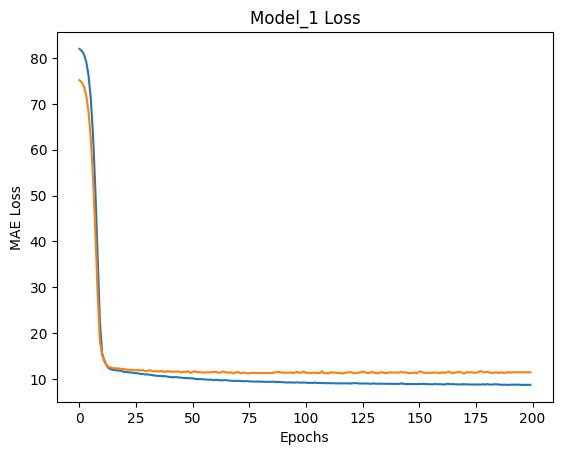

7/7 [==============================] - 0s 1ms/step


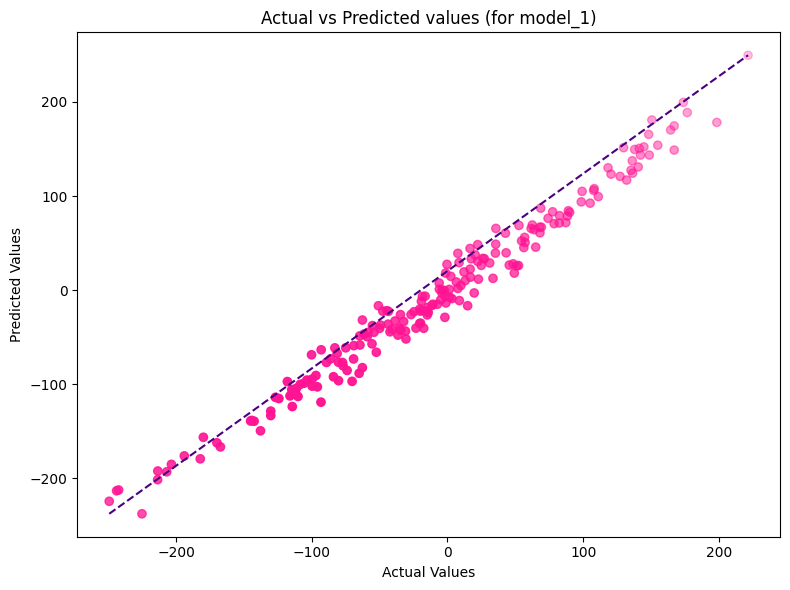

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_regression
num_features = 6
X, y = make_regression(n_samples=1000, n_features=num_features, n_informative=3, noise=13, random_state=33)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(num_features)])
data['Target'] = y

data.to_csv('regression.csv', index=False)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#Neural network model with 3 layers
model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

#Compile and train the model
model_1.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model_1.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

#Evaluate the model on the train data and test data
train_loss = model_1.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MAE) on Training Data:", train_loss)
test_loss = model_1.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE) on Test Data:", test_loss)

#Visualization of learning results
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Model_1 Loss')
plt.show()

#Visualization of the real and predicted values
y_pred_1 = model_1.predict(X_test)
plt.figure(figsize=(8, 6))
distance = np.abs(y_test - y_pred_1) 
max_distance = np.max(distance)
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  #Transparency depending on the distance
    plt.scatter(y_test[i], y_pred_1[i], c='deeppink', alpha=alpha)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_pred_1), max(y_pred_1)], ls='--', c ='indigo')
plt.title('Actual vs Predicted values (for model_1)')
plt.tight_layout()
plt.show()

##### Improvement of the model

Epoch 1/300
25/25 [==============================] - 1s 6ms/step - loss: 58.6404 - mae: 58.6404 - val_loss: 30.9882 - val_mae: 30.9882
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 18.1077 - mae: 18.1077 - val_loss: 13.7104 - val_mae: 13.7104
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 12.4519 - mae: 12.4519 - val_loss: 12.9378 - val_mae: 12.9378
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 11.6808 - mae: 11.6808 - val_loss: 12.1553 - val_mae: 12.1553
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 12.0731 - mae: 12.0731 - val_loss: 12.3125 - val_mae: 12.3125
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 11.6052 - mae: 11.6052 - val_loss: 11.8083 - val_mae: 11.8083
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 10.9086 - mae: 10.9086 - val_loss: 11.9404 - val_mae: 11.9404
Epoch 8/300
25/25 [==============================] - 0s

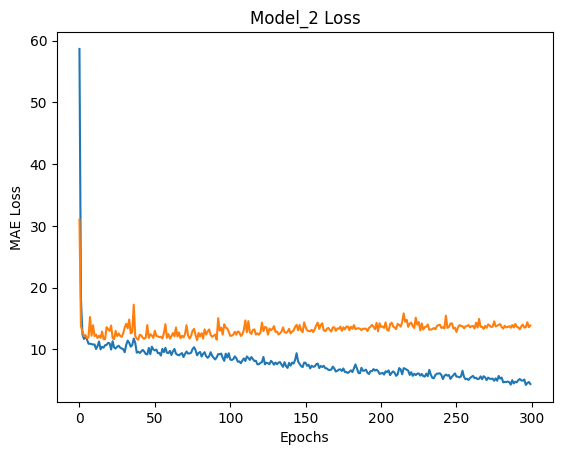

7/7 [==============================] - 0s 1ms/step


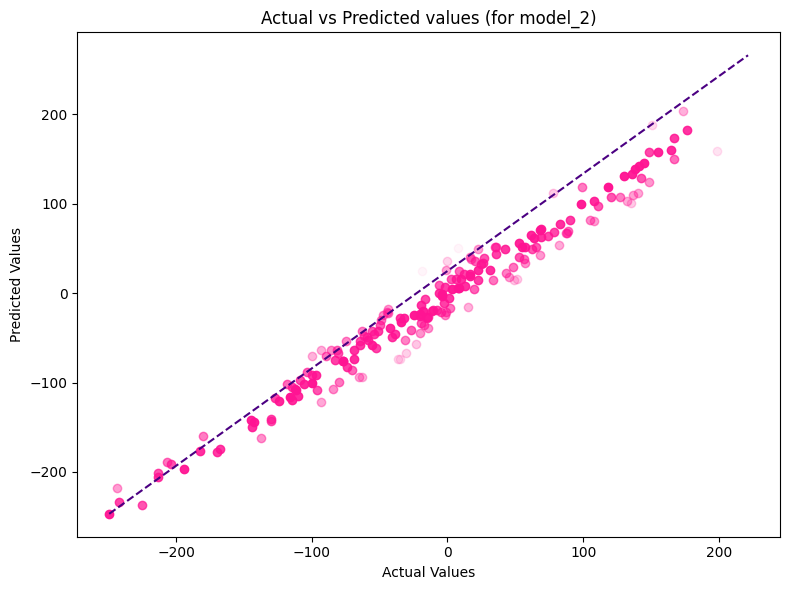


n      model        mae
0  model_1  11.169561
1  model_2  13.788479


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('regression.csv')
X = data.drop('Target', axis=1)
y = data['Target']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#Neural network model with 4 layers
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

#Compile and train the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics=['mae'])
history = model_2.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

#Evaluate the model on the train data and test data
train_loss = model_2.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MAE) on Training Data:", train_loss)
test_loss = model_2.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE) on Test Data:", test_loss)

#Visualization of learning results
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Model_2 Loss')
plt.show()

#Visualization of the real and predicted values
y_pred_2 = model_2.predict(X_test)
plt.figure(figsize=(8, 6))
y_test = y_test.ravel()
y_pred_2 = y_pred_2.ravel()
distance = np.abs(y_test - y_pred_2) 
max_distance = np.max(distance)

for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  #Transparency depending on the distance
    plt.scatter(y_test[i], y_pred_2[i], c='deeppink', alpha=alpha)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_pred_2), max(y_pred_2)], ls='--', c ='indigo')
plt.title('Actual vs Predicted values (for model_2)')
plt.tight_layout()
plt.show()

model_results = [["model_1", model_mae_1],
                 ["model_2", model_mae_2]]
all_results = pd.DataFrame(model_results, columns=["model", "mae"])
print("\nn", all_results)

* Перший параметр оптимізатора Adam - learning_rate (дефолтне значення 0,001) - відповідає за величину кроку, який використовується під час оновлення параметрів моделі під час навчання. Він вказує наскільки великими кроками ми рухаємося в напрямку мінімізації функції втрат під час градієнтного спуску. Якщо збільшити параметр learning_rate у 10 разів, то можливе швидше навчання моделі, проте є можливість пропустити мінімум, нестабільності та переповнення.
* Якщо збільшити тривалість тренування з 200 до 300 епох, то може зменшення функції втрат та збільшитись точність на тренувальному наборі, проте також є можливість ризику перенавчання та зростання часу самого навчання.
* У нашому випадку результати моделей не сильно відрізняються, проте різниця присутня і це означає, що скоріш за все, наша модель надто довго тренувалася, що призвело до різниці у результатах